In [1]:
from dl.simple_cnn import SimpleCNN
from dl.shuffle_net import ShuffleNetV2
from dl.callbacks.plot_loss import PlotLosses
from data.data_set import get_data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TerminateOnNaN, EarlyStopping, ModelCheckpoint, TensorBoard
from config import DL_MODELS_PATH, TB_LOGS_PATH
import os
import pathlib
from swa.tfkeras import SWA
from dl.callbacks.cyclical_lr import CyclicLR
from plotly.offline import init_notebook_mode
from visualization.visualize_history import plot_accuracy_and_loss
init_notebook_mode(connected=True)

2019-12-15 18:39:09,875 : INFO : Checking/creating directories...
2019-12-15 18:39:09,875 : INFO : Directories are set.


In [2]:
((X_train, y_train), (X_val, y_val)) = get_data()

In [3]:
data_generator = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)

In [ ]:
simple_cnn_model = SimpleCNN(optimizer=RMSprop())

In [4]:
def get_callbacks(model_name):
    callbacks = [TerminateOnNaN(), EarlyStopping(monitor='val_categorical_accuracy', patience=5)]
    callbacks.append(ModelCheckpoint(os.path.join(DL_MODELS_PATH, model_name + '-{epoch:02d}-{val_accuracy:.2f}.hdf5'), monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max'))
    tb_path = os.path.join(TB_LOGS_PATH, model_name)
    pathlib.Path(tb_path).mkdir(parents=True, exist_ok=True)
    callbacks.append(TensorBoard(log_dir=tb_path))
    callbacks.append(PlotLosses())
    callbacks.append(SWA(start_epoch=5, lr_schedule='constant', swa_lr=0.001, verbose=1))
    callbacks.append(CyclicLR(base_lr=0.001, max_lr=0.006, step_size=2000.))
    return callbacks

In [ ]:
simple_cnn_history = simple_cnn_model.train(data_generator, X_train, y_train, X_val, y_val,
                      64, 100, get_callbacks('simple_cnn'))

In [ ]:
plot_accuracy_and_loss(simple_cnn_history.history)

In [5]:
shufflenetv2_model = ShuffleNetV2(optimizer=RMSprop())

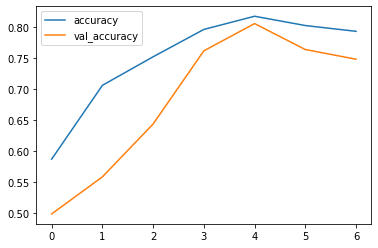

938/937 [==============================] - 511s 545ms/step - loss: 0.5845 - accuracy: 0.7929 - categorical_crossentropy: 0.5846 - categorical_accuracy: 0.7929 - val_loss: 0.7271 - val_accuracy: 0.7479 - val_categorical_crossentropy: 0.7289 - val_categorical_accuracy: 0.7479
Epoch 8/100
 19/937 [..............................] - ETA: 7:52 - loss: 0.5583 - accuracy: 0.8035 - categorical_crossentropy: 0.5583 - categorical_accuracy: 0.8035

In [ ]:
shufflenetv2_history = shufflenetv2_model.train(data_generator, X_train, y_train, X_val, y_val,
                      64, 100, get_callbacks('shufflenetv2'))